In [61]:
import os
import numpy as np
import scipy
from scipy.io import wavfile
import scipy.fftpack as fft
from scipy.signal import get_window
import IPython.display as Audio
import matplotlib.pyplot as plt

import librosa
print(np.__version__)

2.3.3


In [62]:

sample_rate, signal = scipy.io.wavfile.read('cero_1.wav')  # File assumed to be in the same directory

#signal, sample_rate = librosa.load('cero1.wav', sr=11025)  # sr is the sample rate, default is 22050 Hz
audio=signal

#signal=np.array(signal[1,])
print (signal.shape[0])
#signal = signal[0:int(3.5 * sample_rate)]  # Keep the first 3.5 seconds

print("Sample rate: {0}Hz".format(sample_rate))
print("Audio duration: {0}s".format(len(signal) / sample_rate))

t= np.arange (0, int(signal.shape[0])/sample_rate, 1/sample_rate)

5208
Sample rate: 11025Hz
Audio duration: 0.4723809523809524s


In [63]:
#Audio (y, rate=sr)

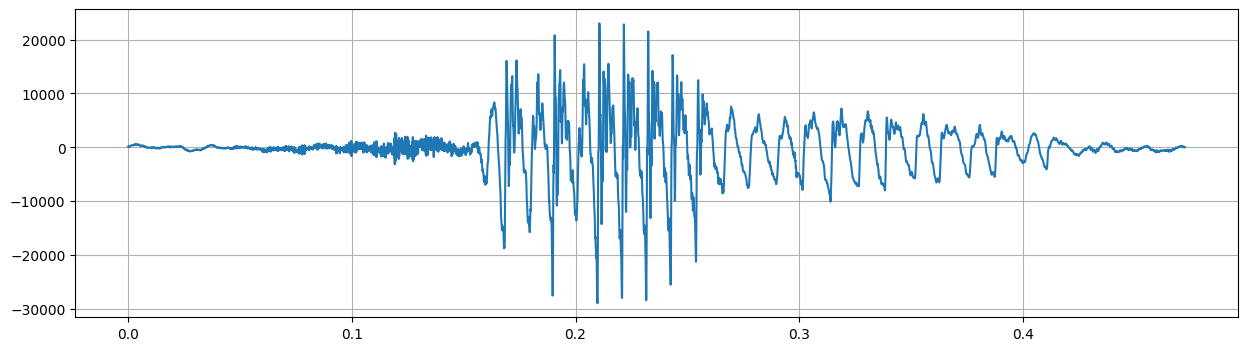

In [64]:
plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio)
plt.grid(True)

In [65]:
import plotly.express as px
px.line (x = t, y = audio )

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'x': {'bdata': ('AAAAAAAAAAB38VHH+MYXP3fxUcf4xi' ... 'HJAgg33j9HxlVyhDjeP2Y74uEAOt4/'),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('gQBAAGgAjQCQAFgALQBkAIIAxwAKAS' ... 'C6AFsAOwBCABQAIQAFADAALQD//y4A'),
                    'dtype': 'i2'},
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})

In [66]:
y=audio
print (y.size)
#ventana = sample_rate // 40
ventana = 256
traslape = 128
# El vector de inicios conserva la información de los valores de las muestras en las que inician las ventanas en que se analiza la señal de voz
inicios = np.arange (0, y.shape[0]-ventana, int(traslape))
# El vector idx lleva la información del número de columna en cuestión
idx = np.arange (0, int(ventana) )
#print (inicios[0: 5])
print (inicios)
print (idx[0: 5])

print (inicios[-5: -1])


5208
[   0  128  256  384  512  640  768  896 1024 1152 1280 1408 1536 1664
 1792 1920 2048 2176 2304 2432 2560 2688 2816 2944 3072 3200 3328 3456
 3584 3712 3840 3968 4096 4224 4352 4480 4608 4736 4864]
[0 1 2 3 4]
[4352 4480 4608 4736]


In [67]:
# a es el vector columna del vector inicios, esto es se transpone el vector inicios
a = inicios[:, np.newaxis]
#print (a)
# Se crean ventanas conjuntas a lo largo de la señal
idxx = a + idx [np.newaxis:]  
print (idxx.shape)

(39, 256)


In [68]:
idxx [0:40, 0]

array([   0,  128,  256,  384,  512,  640,  768,  896, 1024, 1152, 1280,
       1408, 1536, 1664, 1792, 1920, 2048, 2176, 2304, 2432, 2560, 2688,
       2816, 2944, 3072, 3200, 3328, 3456, 3584, 3712, 3840, 3968, 4096,
       4224, 4352, 4480, 4608, 4736, 4864])

In [69]:
# Se procede a conformar una matriz Y a partir de la señal original
Y = y [idxx]
print (Y.shape)

(39, 256)


In [70]:
# El tiempo que corresponde a cada una de las ventanas que se generan
#traslape = int (ventana)
t_ventana = np.arange (0, ventana/sample_rate, 1/sample_rate)

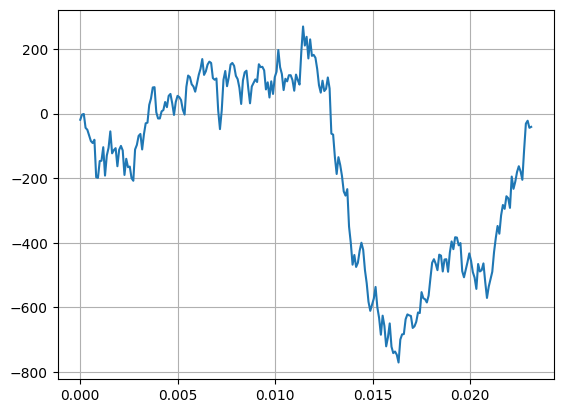

In [71]:
# Se procede a graficar la p-ésima ventana de tiempo
p=1
plt.plot (t_ventana, Y[p,:])
plt.grid()
plt.show()

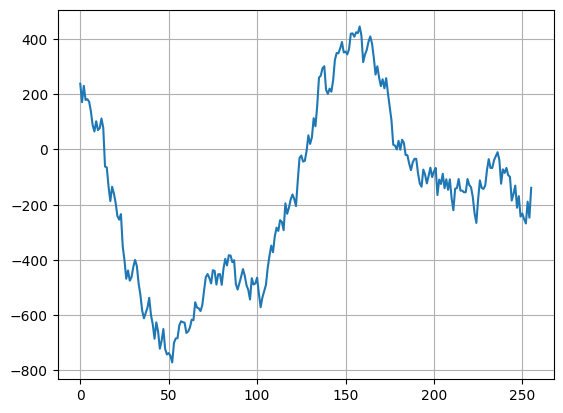

In [72]:
plt.plot (y[ventana:2*ventana])
plt.grid()
plt.show()

In [73]:
# Se genera una ventana de Hanning, por medio de una matriz de ventanas en función de la cantidad de información de la señal Y
hann = np.hanning(ventana) [np.newaxis,:]
hann = np.tile (hann, (Y.shape[0],1))   
print (hann.shape)

(39, 256)


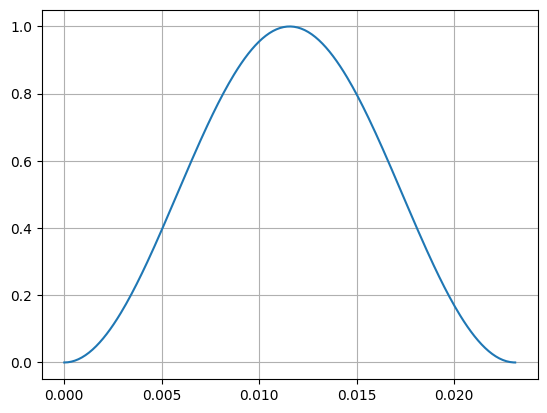

In [74]:
plt.plot (t_ventana, hann[0,:])
plt.grid()
plt.show()

In [75]:
# Se procede a multiplicar cada segmento de la señal por la ventana de Hanning
Y_hann = Y * hann

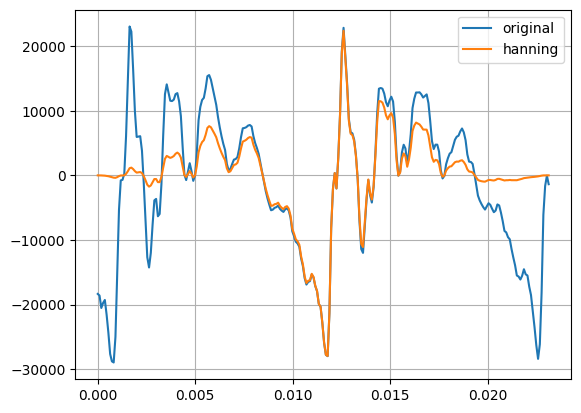

In [76]:
# Se procede a seleccionar la ventana que se desea analizar
i = 18
plt.plot (t_ventana, Y[i,:], label= 'original')
plt.plot (t_ventana, Y_hann[i,:], label = 'hanning')
plt.grid()
plt.legend()
plt.show()

In [77]:
# Se procede a determinar el espectro de cada segmento de la señal original
Yfft = np.fft.fft (Y_hann, axis=1)
#print (Yfft[1:,])

In [78]:
# Se determina o calcula el logaritmo del espectro
YfftdB = 20 * np.log10 (np.abs(Yfft))
print (YfftdB.shape)

(39, 256)


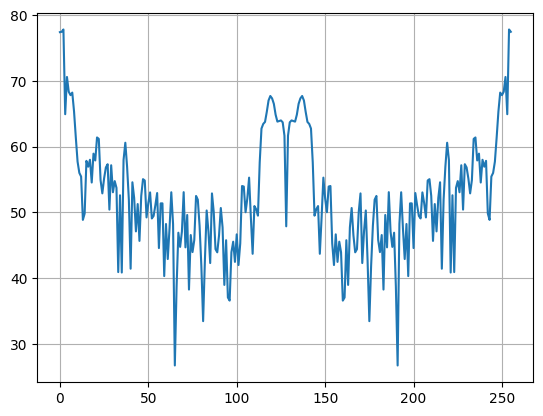

In [79]:
# Se grafica es i-ésimo espectro
i=3
plt.plot (YfftdB[i,:])
#plt.plot (YfftdB)
plt.grid()
plt.show()

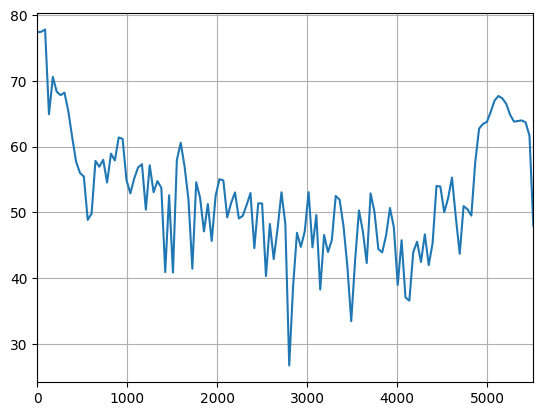

In [80]:
# Se procede a graficar la mitad del espectro ahora en el dominio de la frecuencia, el eje x es la frecuencia
f = np.arange (0, sample_rate, sample_rate/ventana)
i=3
plt.plot (f,YfftdB[i,:])
plt.xlim (0,sample_rate/2)
plt.grid()
plt.show()

(39, 256)
hola
128
(129,)
(39,)


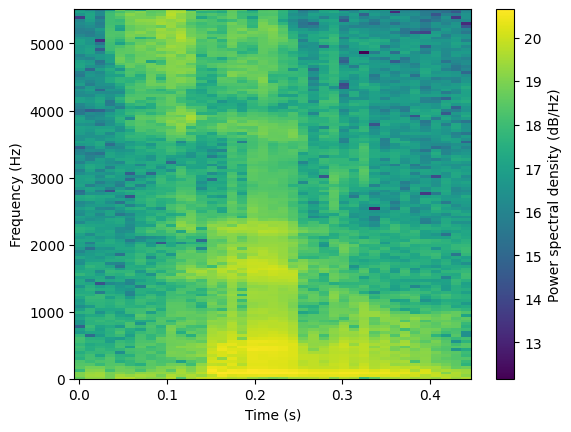

In [81]:
# Se procede a graficar en forma de imagen el espectro
#plt.imshow (YfftdB[:,100:300].T)
#plt.imshow (YfftdB.T)
#plt.show()
print (YfftdB.shape)
spectrogram = np.array(YfftdB[:,0:129].T)
print ("hola")
print (traslape)
# Plot the spectrogram
frequencies = np.fft.rfftfreq(ventana, d=1.0/sample_rate)
print (frequencies.shape)
time = np.arange(len(spectrogram[0])) * (ventana - traslape) / sample_rate
print (time.shape)
plt.pcolormesh(time, frequencies, 10 * np.log10(spectrogram))
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Power spectral density (dB/Hz)")
plt.ylim([0, sample_rate/2.])
plt.show()
# La gráfica muestra los valores invertidos de la frecuencia, con los valores más altos abajo y los inferiores arriba, por lo que se tiene que voltear


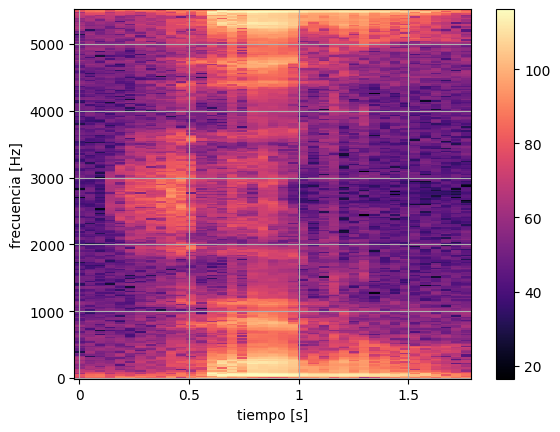

In [82]:
from librosa.display import specshow
specshow(YfftdB.T, sr=sample_rate, x_axis='time', y_axis='hz')
plt.xlabel('tiempo [s]')
plt.ylabel('frecuencia [Hz]')
plt.colorbar()
plt.grid(True)

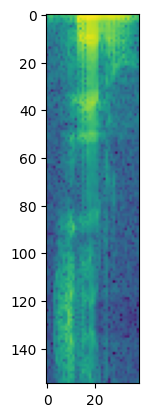

In [83]:
# Se procede a invertir en forma de imagen el espectro
plt.imshow (YfftdB[:,300:100:-1].T)
#plt.imshow (YfftdB.T)
plt.show()


In [84]:

import seaborn as sbn

<Axes: >

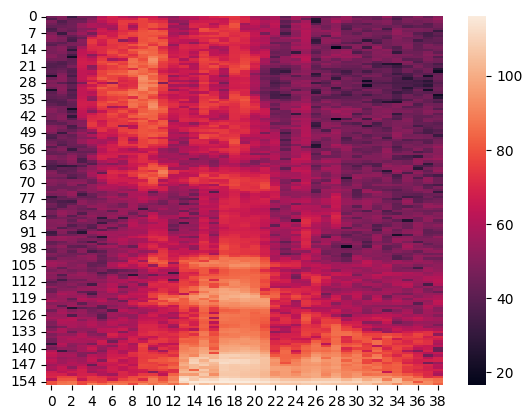

In [85]:
sbn.heatmap (YfftdB [:,100:300].T)

<Axes: >

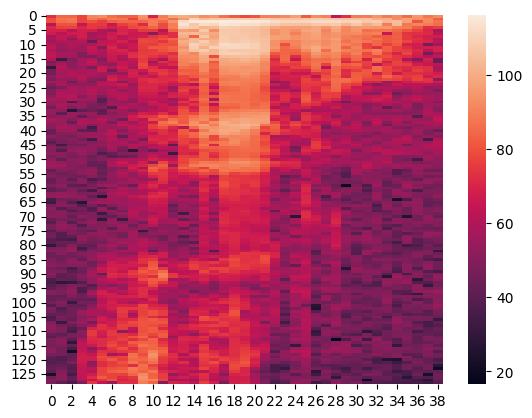

In [86]:
spectrogram = YfftdB[:,0:129].T

#spectrogram = YfftdB[:,0:129].T
sbn.heatmap (YfftdB [:,0:129].T)

<Axes: >

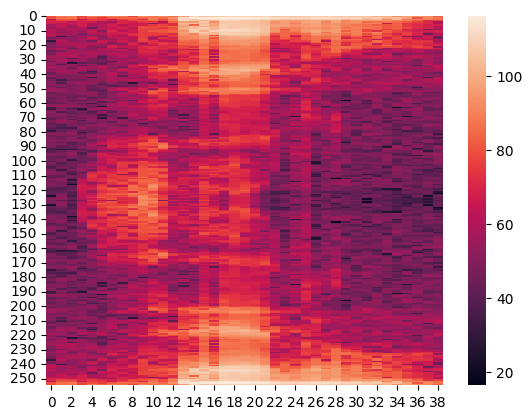

In [87]:
sbn.heatmap (YfftdB [:,int(sample_rate/2):0:-1].T)

In [88]:
print ('f inicial: ', f[100])
print ('f final:  ',f[200])

f inicial:  4306.640625
f final:   8613.28125
